<a href="https://colab.research.google.com/github/GiulianoFassano/prueba-DT/blob/master/GiulianoFassano_Proyecto2_13_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Sprint 2

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que te fue asignada fue ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, se esperó que puedas crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

Ya has tenido una primera aproximación a este problema, pero ahora quieres estudiar si es posible mejorar su desempeño y obtener una visión más profunda del problema. Para ello, debes aplicar transformaciones de datos y entrenar algunos Modelos Avanzados. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?

PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

1. Detección y eliminación de Outliers

2. Encoding

3. Imputación de valores faltantes

4. Escalado de datos

5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

PARTE B - Modelos Avanzados

6. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

9. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

10. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

CIERRE

11. Escribe las conclusiones 

DESAFÍO OPCIONAL

12. Implementa una transformación distinta a la que probaste anteriormente 

13. Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

Primero realizo el mismo análisis del sprint 1.
- El objetivo final del trabajo es ayudar a los evaluadores/as a obtener de mejor manera los precios y valores de las propiedades.

- Los datos que, según analizar en base algunas páginas de propiedades y en google, ayudarán a determinar el valor de una vivienda serán:
       1. ubicación
       2. dimensiones
       3. distribución
       4. amenities
       5. si dispone de quincho/piscina
       6. si se encuentra en un barrio cerrado
       7. la calidad de la construcción
- Dicho esto, hice un análisis de la página de properati, observando cuales son las características que si o si solicitan a la hora de cargar una vivienda. Resultando raro que la superficie total no sea obligatorio. Supongo que más adelante entenderé el porque.

- Es primordial contar con una base de datos correcta, con datos claros y reales. En nuestro caso la base de datos ya la tenemos, pero es super necesario siempre entender el mercado, la situación del país, seguridad, etc.


Conclusión

Determinando como cada uno de esos elementos afecta el precio final, deberíamos poder determinar un precio por metro cuadrado en cada caso.

ANALISIS DE LAS COLUMNAS

Fechas:
- start_date: Fecha de comienzo de la publicacion.

- end_date: Fecha de finalizacion de la publicacion

- created_on: Arroja misma fecha que start_date.

    No se tomaran en cuenta, ya que el precio de todas las publicaciones esta fijado en dolares. Esto no significa que no varian los precios a traves del tiempo, aunque en caso de haber sido en pesos era una variable relevante.

Ubicacion:
- lat: latitud

- lon: longitud

- l1: pais

- l2: zonas

- l3: localidades

    l1 (Argentina no tiene sentido), l2 y l3, son buenas explicativas de la ubicacion pero latitud y longitud son mas precisas ya que distingue la ubicacion exacta dentro de la cada localidad. Aunque habria que analizar si hay alguna consecuencia futura por la escala que maneja dicha variable.

Tamaño:
- rooms

- bedrooms

- bathrooms

- surface_total

- surface_covered

    Todas son relevantes, seria necesario evaluar la incidencia de cada una de estas.

Precio:

- price: variable a predecir
- currency: no tiene sentido, son todas en dolares

Opreacion y tipo:
- title: titulo de la publicacion

- description: Seria muy dificil utilizarla para evaluar la incidencia en el precio, aunque puede ser muy util para analizar detalles sobre alguna propiedad en particular (clave para identificar errores).

- property_type: Variable importante para el analisis, especialmente para el analisis exploratorio de datos, en donde podemos distinguir las caracteristicas de las propiedades segun el tipo.

- operation_type: No tiene sentido, son todas ventas.

# IMPORTACIÓN DE LIBRERIAS

In [ ]:
!pip install feature_engine
!pip install category_encoders
!pip install fitter
!pip install scikit-learn

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#importo las librerias de pipeline
import feature_engine
import category_encoders as ce
from imblearn.pipeline import Pipeline
from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, MeanMedianImputer, ArbitraryNumberImputer 
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.encoding import RareLabelEncoder, MeanEncoder
from sklearn.compose import ColumnTransformer

##from skopt.space import Real, Integer
##from skopt.utils import use_named_args
##from skopt import gp_minimize
##from skopt.plots import plot_convergence

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

# Librería para medir tiempos
import time

In [ ]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
# Tomamos el tiempo de inicio de ejecucion
start_time = time.time()

In [ ]:
#Seteamos para que no utilice notacion cientifica
pd.options.display.float_format = '{:.4f}'.format
#Seteo para que el máximo de columnas que muestra al levantar una base sean 500
pd.set_option('display.max_columns',500)
#Estos códigos hacen que la visualización de la consola abarque toda la pantalla (sin los recortes a los costados). Tambien hacen que al mostrar dataframes podamos ver todas las columnas que tiene.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Codigo para poder imprimir multiples outputs en una misma línea
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Modelo realizado en el Sprint 1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /gdrive


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
datap = pd.read_csv("/content/gdrive/MyDrive/ACAMICA - DS/proyecto 2/DS_Proyecto_01_Datos_Properati.csv")
df = pd.DataFrame (datap[datap.property_type.isin(["Departamento", "PH", "Casa"]) & datap.l2.isin(["Capital Federal"])])
df.columns = ["inicio", "finalización", "creado", "latitud", "longitud", "pais", "region", "localidad", "ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio", "moneda", "titulo", "descripcion", "tipo", "tipo_de_operacion"]
df = pd.DataFrame (df[(df.superficie >= 15) & (df.superficie <= 1000)])
df = pd.DataFrame (df[(df.precio <= 4000000)])
df = df[["ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio"]]
df = df.dropna()
print("nombres de las columnas: ", df.columns)
print("cantidad de filas y columnas: ", df.shape)

nombres de las columnas:  Index(['ambientes', 'dormitorios', 'baños', 'superficie',
       'superficie_cubierta', 'precio'],
      dtype='object')
cantidad de filas y columnas:  (81019, 6)


In [ ]:
#elegimos las variables X e Y
X = df[["ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta"]]
y = df[["precio"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

#definimos el modelo
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42).fit(X_train, y_train)

#entrenamos los modelos

tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
#realizamos una estimación de los test con el modelo entrenado.

y_train_pred = tree_regressor.predict(X_train).round(2)
y_test_pred = tree_regressor.predict(X_test).round(2)

In [ ]:
#Metricas del modelo realizado en el step 1. Con los que se comparará los siguientes:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Error cuadrático medio en Train (MSE): {mse_train.round()}')
print(f'Error cuadrático medio en Test (MSE): {mse_test.round()}')

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Error absoluto medio en Train (MAE): {mae_train.round()}')
print(f'Error absoluto medio en Test (MAE): {mae_test.round()}')

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train.round()}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test.round()}')

Coeficiente_determinación_train = r2_score(y_train, y_train_pred)
Coeficiente_determinación_test = r2_score(y_test, y_test_pred)
print(f'El coeficiente de determinación en train es: {Coeficiente_determinación_train}')
print(f'El coeficiente de determinación en test es: {Coeficiente_determinación_test}')

Error cuadrático medio en Train (MSE): 14592036210.0
Error cuadrático medio en Test (MSE): 23393909768.0
Error absoluto medio en Train (MAE): 58639.0
Error absoluto medio en Test (MAE): 65881.0
Raíz del error cuadrático medio en Train (RMSE): 120798.0
Raíz del error cuadrático medio en Test (RMSE): 152951.0
El coeficiente de determinación en train es: 0.8351328504335362
El coeficiente de determinación en test es: 0.7439967064803783


# Comenzamos a trabajar el sprint 2

In [ ]:
# Traeremos el data set de properati, modifico los nombres de las columnas y elimino las que no voy a utilizar.
df = pd.read_csv("/content/gdrive/MyDrive/ACAMICA - DS/proyecto 2/DS_Proyecto_01_Datos_Properati.csv")
df.columns = ["inicio", "finalización", "creado", "latitud", "longitud", "pais", "region", "localidad", "ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio", "moneda", "titulo", "descripcion", "tipo", "tipo_de_operacion"]
df = df[["latitud", "longitud", "pais", "region", "localidad", "ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio", "tipo"]]

print("nombres de las columnas: ", df.columns)
print("cantidad de filas y columnas: ", df.shape)

nombres de las columnas:  Index(['latitud', 'longitud', 'pais', 'region', 'localidad', 'ambientes',
       'dormitorios', 'baños', 'superficie', 'superficie_cubierta', 'precio',
       'tipo'],
      dtype='object')
cantidad de filas y columnas:  (146660, 12)


In [ ]:
df.head()

,latitud,longitud,pais,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,precio,tipo
0,-34.6059,-58.3849,Argentina,Capital Federal,San Cristobal,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000,Departamento
1,-34.6241,-58.4121,Argentina,Capital Federal,Boedo,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000,PH
2,-34.5936,-58.4275,Argentina,Capital Federal,Palermo,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000,PH
3,-34.5813,-58.4368,Argentina,Capital Federal,Palermo,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000,PH
4,-34.9142,-57.9382,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0000,1.0000,1.0000,50.0000,35.0000,40000.0000,PH


In [ ]:
df.dtypes

latitud                float64
longitud               float64
pais                    object
region                  object
localidad               object
ambientes              float64
dormitorios            float64
baños                  float64
superficie             float64
superficie_cubierta    float64
precio                 float64
tipo                    object
dtype: object

In [ ]:
#voy a elegir sólo Departamentos, PH y Casas. Ya que como se vió en el sprint uno son las mas importantes, 
#las que más cantidad tienen y para poder compararlo despues

df = pd.DataFrame (df[df.tipo.isin(["Departamento", "PH", "Casa"])])
df.groupby("tipo").size()

tipo
Casa             21521
Departamento    107326
PH               14298
dtype: int64

In [ ]:
df.isna().sum() #sumamos los valores nulos para comenzar con el pre procesamiento de datos.

latitud                 9593
longitud                9624
pais                       0
region                     0
localidad                  0
ambientes                  0
dormitorios                0
baños                   4211
superficie             18623
superficie_cubierta    18909
precio                     0
tipo                       0
dtype: int64

## PARTE A - Transformación de Datos

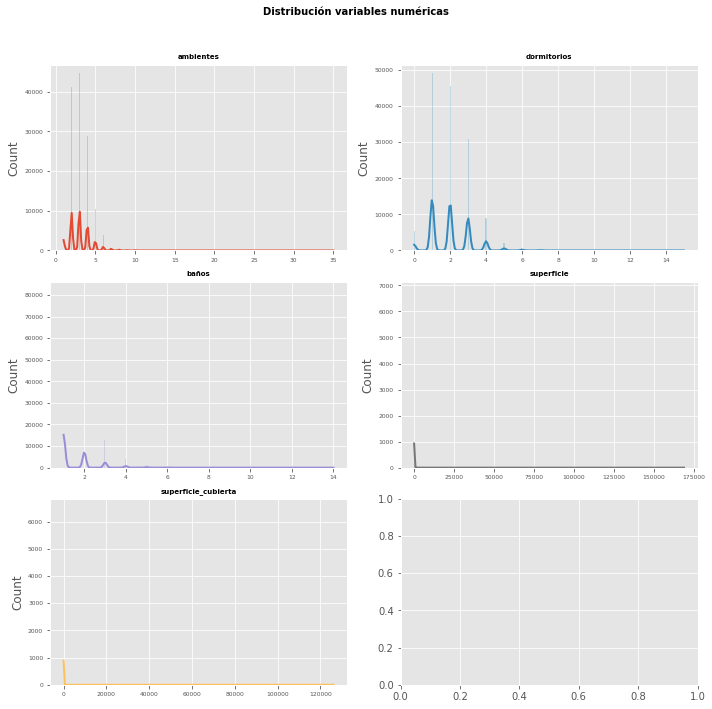

In [ ]:
#Gráfico de distribución para cada variable numérica

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop(['precio', 'latitud', 'longitud'])

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

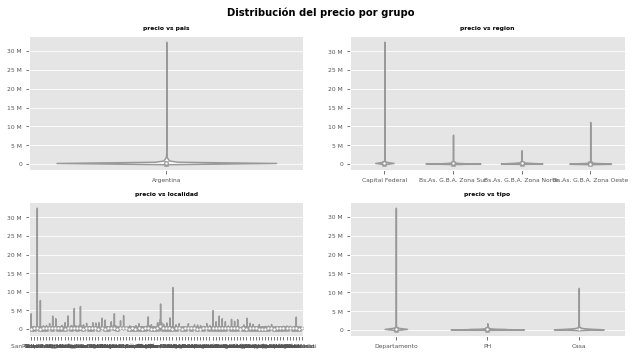

In [ ]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'precio',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 6, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del precio por grupo', fontsize = 10, fontweight = "bold");

### 1. Imputación de valores faltantes

Como observamos en los 3 puntos anteriores, tenemos valores faltantes en latitud y longitud, en baños y en superficies. Y sólo en variables numericas. Para completarlo realizaremos lo siguiente:
1. Baños tendremos en cuenta la mediana (teniendo en cuenta los datos y la distribución observada) siempre y cuando siga la logica de 1 baño en departamentos y ph y 2 o 3 en casas. Elijo la mediana y no la media para no corroer la distribución.
2. Latitud y longitud lo haremos en base a cada uno de los barrios. Es decir, buscaremos la mediana de cada barrio y le pondremos dicha media dependiendo en que barrio se encuentra. Al elegir la mediana del barrio, se entiende que si o si la latitud y la longitud cae en ese valor. Ya si vamos muy minusioso podriamos estar infravalorando a casas que caen en calles importantes, pero se entiende que por la cantidad de datos no sería tan importante.
3. Superficies es un poco más complicado encontrar la forma, ya que deberíamos crear un modelo para determinar dichos valores. Lo que si podemos definir es a los datos de superficie total vacios, ponerle la superficie cubierta y viceversa. Otra opción para el resto es buscar la mediana de metros cuadrados dependiendo tipo de propiedad o hacer un análisis en base a precio (que se analizará al llegar, pero que por la cantidad de datos y porque podríamos estar siendo demasiados subjetivos, no es recomendable).

#### Baños

In [ ]:
#primero agrupo y calculo la mediana

dic_agrupado_tipo = pd.DataFrame(df.groupby("tipo").agg({"baños" : "median"}))
dic_agrupado_tipo.reset_index(inplace = True, drop = False)

dic_agrupado_tipo

,tipo,baños
0,Casa,2.0000
1,Departamento,1.0000
2,PH,1.0000


In [ ]:
# creo un for y una mascara para imputar a valores nulos la cantidad de baños promedios que calcule anteriormente.
for x in range(dic_agrupado_tipo.shape[0]):
    tipo = dic_agrupado_tipo.tipo[x]
    baños = dic_agrupado_tipo.baños[x]
    
    mask = (pd.isna(df.baños)) & (df.tipo == tipo)
    df.loc[mask, "baños"] = baños

In [ ]:
df.baños.value_counts()

1.0000     84930
2.0000     39899
3.0000     12830
4.0000      3878
5.0000      1151
6.0000       309
7.0000        97
8.0000        16
9.0000        10
10.0000        9
11.0000        7
14.0000        6
13.0000        2
12.0000        1
Name: baños, dtype: int64

In [ ]:
#corroboro que no hay más datos nulos
df.isna().sum()

latitud                 9593
longitud                9624
pais                       0
region                     0
localidad                  0
ambientes                  0
dormitorios                0
baños                      0
superficie             18623
superficie_cubierta    18909
precio                     0
tipo                       0
dtype: int64

In [ ]:
df.dtypes

latitud                float64
longitud               float64
pais                    object
region                  object
localidad               object
ambientes              float64
dormitorios            float64
baños                  float64
superficie             float64
superficie_cubierta    float64
precio                 float64
tipo                    object
dtype: object

Text(0.5, 1.0, 'Baños promedio por Tipo')

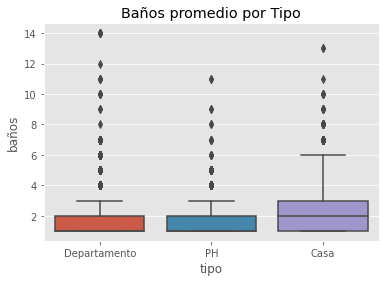

In [ ]:
sns.boxplot (data = df, x = "tipo", y = "baños")
plt.title("Baños promedio por Tipo")

#### Latitud y Longitud

In [ ]:
#básicamente hacemos lo mismo que lo anterior pero por barrio y por latitud y longitud
#primero agrupo y calculo la mediana

dic_agrupado_logitud = pd.DataFrame(df.groupby("localidad").agg({"longitud" : "median"}))
dic_agrupado_logitud.reset_index(inplace = True, drop = False)
dic_agrupado_logitud


dic_agrupado_latitud = pd.DataFrame(df.groupby("localidad").agg({"latitud" : "median"}))
dic_agrupado_latitud.reset_index(inplace = True, drop = False)
dic_agrupado_latitud


,localidad,longitud
0,Abasto,-58.4110
1,Agronomía,-58.4913
2,Almagro,-58.4215
3,Almirante Brown,-58.3889
4,Avellaneda,-58.3465
5,Balvanera,-58.4037
6,Barracas,-58.3745
7,Barrio Norte,-58.4043
8,Belgrano,-58.4539
9,Berazategui,-58.1969


,localidad,latitud
0,Abasto,-34.6039
1,Agronomía,-34.5926
2,Almagro,-34.6046
3,Almirante Brown,-34.8028
4,Avellaneda,-34.6821
5,Balvanera,-34.6105
6,Barracas,-34.6394
7,Barrio Norte,-34.5933
8,Belgrano,-34.5630
9,Berazategui,-34.7892


In [ ]:
# creo un for y una mascara para imputar a valores nulos la cantidad de baños promedios que calcule anteriormente.
for x in range(dic_agrupado_logitud.shape[0]):
    vble_localidad = dic_agrupado_logitud.localidad[x]
    vlbe_longitud = dic_agrupado_logitud.longitud[x]
    
    mask = (pd.isna(df.longitud)) & (df.localidad == vble_localidad)
    df.loc[mask, "longitud"] = vlbe_longitud
    


In [ ]:
df.isna().sum()

latitud                 9593
longitud                   0
pais                       0
region                     0
localidad                  0
ambientes                  0
dormitorios                0
baños                      0
superficie             18623
superficie_cubierta    18909
precio                     0
tipo                       0
dtype: int64

In [ ]:
for x in range(dic_agrupado_latitud.shape[0]):
    vble_localidad = dic_agrupado_latitud.localidad[x]
    vlbe_latitud = dic_agrupado_latitud.latitud[x]
    
    mask = (pd.isna(df.latitud)) & (df.localidad == vble_localidad)
    df.loc[mask, "latitud"] = vlbe_latitud
    

In [ ]:
df.isna().sum()

latitud                    0
longitud                   0
pais                       0
region                     0
localidad                  0
ambientes                  0
dormitorios                0
baños                      0
superficie             18623
superficie_cubierta    18909
precio                     0
tipo                       0
dtype: int64

#### Superficies

In [ ]:
# observamos en cuantos valores se repite que al no haber latitud tampoco hay longitud. 
np.logical_and(pd.isnull(df.superficie_cubierta), pd.isnull(df.superficie)).sum()


18113

Podemos suponer que esto pasa al no querer que se sepa la localización exacta de las casas, como la forma de llenar dichos espacios no es factible como mencionamos anteriormente, procedemos a eliminar datos nulos.

In [ ]:
df = df.dropna()

In [ ]:
#corroboramos nuevamente datos nulos
df.isna().sum()

latitud                0
longitud               0
pais                   0
region                 0
localidad              0
ambientes              0
dormitorios            0
baños                  0
superficie             0
superficie_cubierta    0
precio                 0
tipo                   0
dtype: int64

#### Resumen

Rellenamos los valores nulos de todas las variables que nos interesaban, teniendo en cuenta si era importante calcularlo y de manera objetiva los valores que debían tomar como así también si era relevante y no sesgaban nuestros futuros análisis al hacerlo.

### 2. Detección y eliminación de Outliers

Vamos a observar los outliers y eliminarlo según alguno de los parámetros estudiados. Primero realizaremos un boxplot y un displot.

La idea es hacerlo según tipo de vivienda, ya que dependiendo el tipo, realmente va a ser un outlier o no.

Se utilizará primero un análisis subjetivo y luego se realizará por rango intercuartílico o la regla de tres sigma según se estime mejor.

In [ ]:
df.describe()

#Observamos mediante los maximos y minimos. En latitud y longitud no nos dice nada. Lo importante es superficie total y cubierta, dormitorios, ambientes y 
#baños.

,latitud,longitud,ambientes,dormitorios,baños,superficie,superficie_cubierta,precio
count,123726.0000,123726.0000,123726.0000,123726.0000,123726.0000,123726.0000,123726.0000,123726.0000
mean,-34.5952,-58.4658,3.1276,2.0666,1.5861,182.9274,112.4493,243612.3743
std,0.0976,0.1416,1.3891,1.0819,0.8739,1441.2864,920.8103,299197.9175
min,-35.1508,-59.0424,1.0000,0.0000,1.0000,10.0000,1.0000,6000.0000
25%,-34.6192,-58.5052,2.0000,1.0000,1.0000,52.0000,47.0000,115000.0000
50%,-34.5974,-58.4433,3.0000,2.0000,1.0000,78.0000,68.0000,170000.0000
75%,-34.5685,-58.4106,4.0000,3.0000,2.0000,138.0000,108.0000,268434.0000
max,-34.1714,-57.8058,35.0000,15.0000,14.0000,169000.0000,126062.0000,32434232.0000


In [ ]:
df.shape

(123726, 12)

###### Conclusiones
1. Ambientes 35 muy posiblemente sea un outlier, mientras que 1 en departamentos y ph no, pero en casa puede serlo.
2. 14 baños seguramente sea un outlier. 
3. Dormitorios 0 acepta la idea de monoambientes, no seria un outlier. Los 15 ambientes tampoco es "mucho" para casas.
4. La superficie tanto en minimo como en maximo aparentan ser outliers siendo que eliminamos terrenos, campos, etc.


#### Vamos a ir variable por variable analizando los outliers.

In [ ]:
#Primero divido por tipo de propiedad
df_ph = df[df["tipo"]=="PH"]
df_dpto = df[df["tipo"]=="Departamento"]
df_casa = df[df["tipo"]=="Casa"]

#### Ambientes

In [ ]:
print ("PH")
df_ph.groupby("ambientes").size()
print ("Departamento")
df_dpto.groupby("ambientes").size()
print ("Casa")
df_casa.groupby("ambientes").size()

PH


ambientes
1.0000      152
2.0000     2421
3.0000     5303
4.0000     3892
5.0000     1501
6.0000      390
7.0000      194
8.0000      145
9.0000       30
10.0000      24
11.0000      15
12.0000       6
14.0000       1
15.0000       7
16.0000       3
20.0000       1
35.0000       1
dtype: int64

Departamento


ambientes
1.0000      7978
2.0000     33050
3.0000     30384
4.0000     16195
5.0000      3660
6.0000      1165
7.0000       356
8.0000       217
9.0000        44
10.0000       35
11.0000        8
12.0000       28
13.0000        2
14.0000        5
15.0000        3
21.0000        2
32.0000        1
dtype: int64

Casa


ambientes
1.0000       39
2.0000      360
3.0000     3313
4.0000     5279
5.0000     3850
6.0000     1978
7.0000      980
8.0000      386
9.0000      136
10.0000     116
11.0000      20
12.0000      15
13.0000       9
14.0000       5
15.0000       5
16.0000       4
18.0000       2
20.0000       6
24.0000       1
26.0000       2
30.0000       1
dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Ambientes promedio por Tipo')

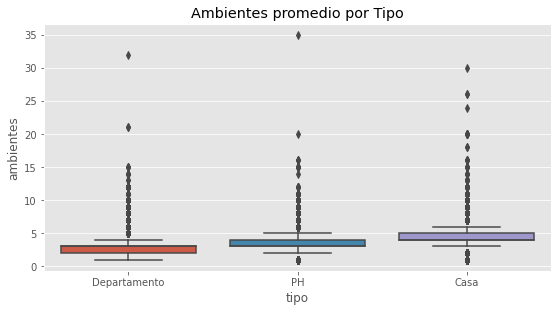

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot (2,2,1)
sns.boxplot (data = df, x = "tipo", y = "ambientes")
plt.title("Ambientes promedio por Tipo")

Esta variable, como la que sigue (baños), son variables que pueden definirse subjetivamente. En estos casos tendremos en cuenta:
Para PH hasta 5 ambientes.
Para Departamentos hasta 5 ambientes.
Para Casas hasta 8 ambientes parece acorde, capaz habría que sacar las de 1 ambiente, pero no es representativo, por lo que se dejarán.

Todo esto, por la cantidad de datos y el % de incidencia que puede tener dentro de cada uno.

In [ ]:
df = df[((df.tipo=="Departamento")&(df.ambientes<=5))
       |((df.tipo=="PH")&(df.ambientes<=5))
       |((df.tipo=="Casa")&(df.ambientes<=8))]

In [ ]:
df.shape

(120721, 12)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Ambientes promedio por Tipo')

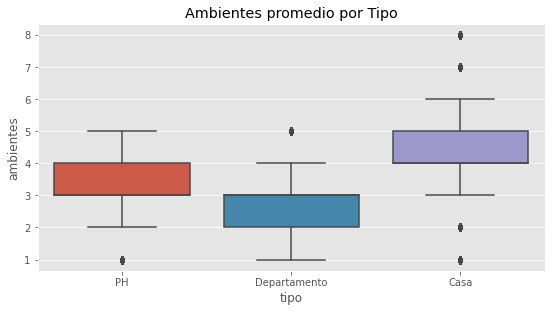

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot (2,2,1)
sns.boxplot (data = df, x = "tipo", y = "ambientes")
plt.title("Ambientes promedio por Tipo")

Lo importante en este punto es entender que la mayor cantidad de datos que dejamos afuera es de departamentos, que representa muy poco para la cantidad total que tenemos. 
Se sobre entiende que un modelo de este tipo, no me va a poder predecir correcto casas y departamentos lujosos, va a poder predecir la "casa tipo". Por ello es que la eliminación se hace de esta forma.

#### BAÑOS

In [ ]:
print ("PH")
df_ph.groupby("baños").size()
print ("Departamento")
df_dpto.groupby("baños").size()
print ("Casa")
df_casa.groupby("baños").size()

PH


baños
1.0000     8845
2.0000     4175
3.0000      773
4.0000      202
5.0000       75
6.0000        4
7.0000        6
8.0000        2
9.0000        2
11.0000       2
dtype: int64

Departamento


baños
1.0000     59412
2.0000     23749
3.0000      7242
4.0000      1999
5.0000       582
6.0000       104
7.0000        26
8.0000         1
9.0000         2
10.0000        5
11.0000        4
12.0000        1
14.0000        6
dtype: int64

Casa


baños
1.0000     5250
2.0000     6625
3.0000     3027
4.0000     1068
5.0000      332
6.0000      133
7.0000       50
8.0000       10
9.0000        6
10.0000       3
11.0000       1
13.0000       2
dtype: int64

Text(0.5, 1.0, 'Baños promedio por Tipo')

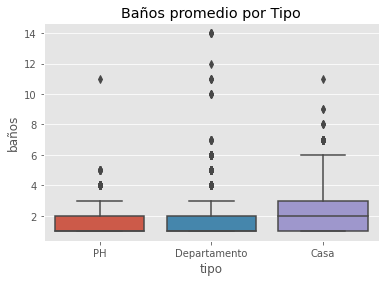

In [ ]:
sns.boxplot (data = df, x = "tipo", y = "baños")
plt.title("Baños promedio por Tipo")


Para PH tomaremos sólo 3 bañis, mientras que para departamenos, si bien me parece excesivo, por la cantidad de datos tendremos en cuenta hasta 3 baños.
Por el lado de Casas, tomaremos como representativos hasta 4 baños inclusive.

In [ ]:
df = df[((df.tipo=="Departamento")&(df.baños<=3))
       |((df.tipo=="PH")&(df.baños<=3))
       |((df.tipo=="Casa")&(df.baños<=4))]

In [ ]:
df.shape

(117996, 12)

Text(0.5, 1.0, 'Baños promedio por Tipo')

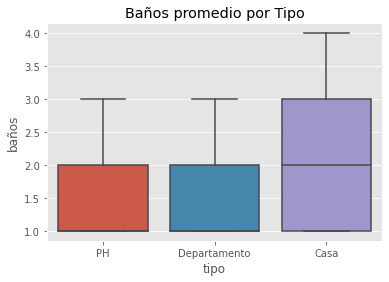

In [ ]:
sns.boxplot (data = df, x = "tipo", y = "baños")
plt.title("Baños promedio por Tipo")


Previo a tomar en cuenta dormitorios y comenzar con las superficies, tiramos otro "describe" para ver si hace falta.

In [ ]:
df.describe()

,latitud,longitud,ambientes,dormitorios,baños,superficie,superficie_cubierta,precio
count,117996.0000,117996.0000,117996.0000,117996.0000,117996.0000,117996.0000,117996.0000,117996.0000
mean,-34.5954,-58.4671,2.9884,1.9713,1.4817,173.4197,104.8570,213824.2623
std,0.0982,0.1423,1.1752,0.9620,0.6871,1456.1754,912.8834,196991.3883
min,-35.1508,-59.0424,1.0000,0.0000,1.0000,10.0000,1.0000,6000.0000
25%,-34.6199,-58.5069,2.0000,1.0000,1.0000,51.0000,46.0000,113000.0000
50%,-34.5977,-58.4443,3.0000,2.0000,1.0000,75.0000,65.0000,165000.0000
75%,-34.5686,-58.4122,4.0000,3.0000,2.0000,125.0000,100.0000,250000.0000
max,-34.1714,-57.8058,8.0000,15.0000,4.0000,169000.0000,126062.0000,11111111.0000


Observamos que siguen habiendo outliers de dormitorios y de superficies, por lo que con dormitorios realizaremos el mismo procedimiento que venimos realizando, mientras que para superficies utilizaremos los metodos de quartiles.

No podemos tener 7 ambientes y 15 dormitorios.

#### Dormitorios

In [ ]:
print ("PH")
df_ph.groupby("dormitorios").size()
print ("Departamento")
df_dpto.groupby("dormitorios").size()
print ("Casa")
df_casa.groupby("dormitorios").size()

PH


dormitorios
0.0000       15
1.0000     2661
2.0000     5681
3.0000     3919
4.0000     1285
5.0000      213
6.0000      165
7.0000      111
8.0000       11
9.0000       11
10.0000       2
11.0000       2
12.0000       4
13.0000       2
14.0000       1
15.0000       3
dtype: int64

Departamento


dormitorios
0.0000       586
1.0000     40744
2.0000     31066
3.0000     17163
4.0000      3034
5.0000       390
6.0000        64
7.0000        44
8.0000        16
9.0000         3
10.0000        9
11.0000        7
12.0000        4
13.0000        1
14.0000        1
15.0000        1
dtype: int64

Casa


dormitorios
0.0000        1
1.0000      448
2.0000     4110
3.0000     6828
4.0000     3550
5.0000     1082
6.0000      338
7.0000       85
8.0000       27
9.0000       10
10.0000       8
11.0000       4
12.0000       7
13.0000       3
14.0000       4
15.0000       2
dtype: int64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Dormitorios promedio por Tipo')

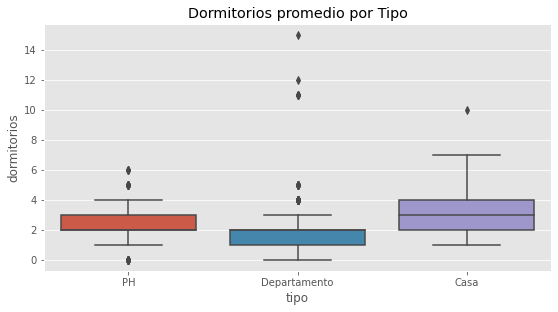

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot (2,2,1)
sns.boxplot (data = df, x = "tipo", y = "dormitorios")
plt.title("Dormitorios promedio por Tipo")

Los dormitorios en 0 se podria entender en dormitorios monoambientes, como máximo se tomará 3.
En cuanto a Casas, tendremos de 1 dormitorio y hasta 5 dormitorios teniendo en cuenta que se tomó hasta 7 ambientes solamente.
PH será de a 1 dormitorio y hasta 4.

In [ ]:
df = df[((df.tipo=="Departamento")&(df.dormitorios<=3))
       |((df.tipo=="PH")&(df.dormitorios<=4)&(df.dormitorios>=1))
       |((df.tipo=="Casa")&(df.dormitorios<=5)&(df.dormitorios>=1))]

In [ ]:
df.shape

(115991, 12)

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Dormitorios promedio por Tipo')

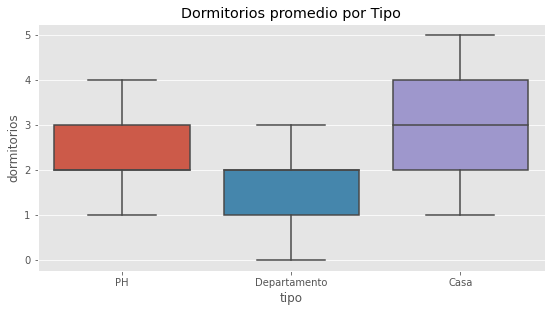

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot (2,2,1)
sns.boxplot (data = df, x = "tipo", y = "dormitorios")
plt.title("Dormitorios promedio por Tipo")


#### Superficies y Precio

En lo que es superficies y como se hizo en el primer sprint, lo primero que haremos será eliminar aquellos que tengan una superficie cubierta mayor a la superficie total.

In [ ]:
df = pd.DataFrame (df[df.superficie >= df.superficie_cubierta])

In [ ]:
df.shape

(114678, 12)

Ahora analizamos superficies y precio

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Superficie Cubierta')

Text(0.5, 0, 'Superficie Cubierta')

Text(0.5, 1.0, 'Superficie')

Text(0.5, 0, 'Superficie')

Text(0.5, 1.0, 'Precio')

Text(0.5, 0, 'Precio')

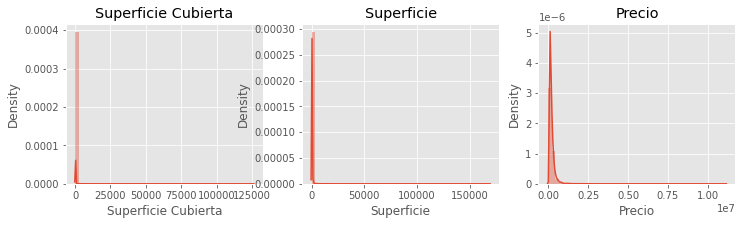

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot (3,3,1)
plt.title("Superficie Cubierta")
plt.xlabel ("Superficie Cubierta")
sns.distplot(df.superficie_cubierta.values)
plt.subplot (3,3,2)
plt.title("Superficie")
plt.xlabel ("Superficie")
sns.distplot(df.superficie.values)
plt.subplot (3,3,3)
plt.title("Precio")
plt.xlabel ("Precio")
sns.distplot(df.precio.values)

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Superficie')

Text(0.5, 1.0, 'Superficie cubierta')

Text(0.5, 1.0, 'precio')

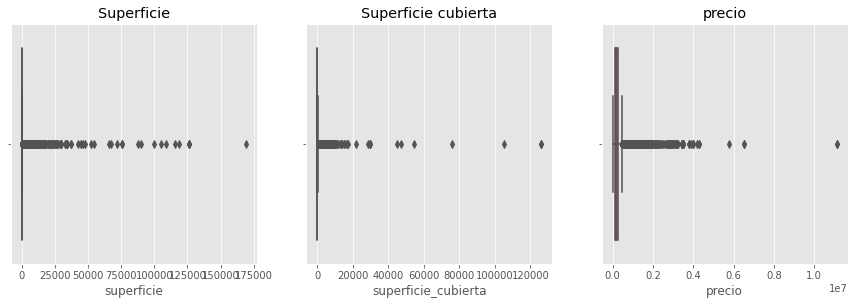

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot (3,3,1)
sns.boxplot (data=df, x="superficie") 
plt.title("Superficie")
plt.subplot (3,3,2)
sns.boxplot (data=df, x="superficie_cubierta") 
plt.title("Superficie cubierta")
plt.subplot (3,3,3)
sns.boxplot (data=df, x="precio") 
plt.title("precio")

Observamos que hay muchos datos que sesgan y caen en outliers, por lo que hay que determinar cuales debemos eliminar.
Para ello, se analizará utilizar o el rango intercuartilico o la regla de las 3 sigmas, eligiendo la que menor datos elimine. 
En la parte de superficie se tomará como variable a la superficie total y no a la superficie cubierta ya que hicimos el primer corte de superficie cubierta <= a superficie total.

#### Rango Intercuartilico

In [ ]:
# Superficie

IQR_superficie = df.superficie.quantile(0.75) - df.superficie.quantile(0.25)
IQR_superior_sup = df.superficie.quantile(0.75) + 1.5 * IQR_superficie
IQR_inferior_sup = df.superficie.quantile(0.25) - 1.5 * IQR_superficie

# Precio

IQR_precio = df.precio.quantile(0.75) - df.precio.quantile(0.25)
IQR_superior_precio = df.precio.quantile(0.75) + 1.5 * IQR_precio
IQR_inferior_precio = df.precio.quantile(0.25) - 1.5 * IQR_precio

In [ ]:
outliers = np.logical_or(np.logical_or(df.superficie > IQR_superior_sup,
                         df.superficie < IQR_inferior_sup), 
                         np.logical_or(df.precio > IQR_superior_precio,
                         df.precio < IQR_inferior_precio)).sum()

print('Con 1.5 rangos intercuartilicos, se descartaria: ', (outliers / df.index.size * 100).round(2), '%')

Con 1.5 rangos intercuartilicos, se descartaria:  14.49 %


#### Regla de tres sigmas

In [ ]:
# Superficie

sigma_superior_sup = df.superficie.mean() + 3 * df.superficie.std()
sigma_inferior_sup = df.superficie.mean() - 3 * df.superficie.std()

# Precio

sigma_sup_precio = df.precio.mean() + 3 * df.precio.std()
sigma_inf_precio = df.precio.mean() - 3 * df.precio.std()

In [ ]:
outliers = np.logical_or(np.logical_or(df.superficie > sigma_superior_sup,
                         df.superficie < sigma_inferior_sup), 
                         np.logical_or(df.precio > sigma_sup_precio,
                         df.precio < sigma_inf_precio)).sum()

print('Con 3 sigmas, se descartaria: ', (outliers / df.index.size * 100).round(2), '%')

Con 3 sigmas, se descartaria:  1.73 %


Nos encontramos con la controversia de no querer eliminar muchos datos pero de tener muchos datos como outlier. 
Para el precio la regla de 3 sigma es acorde, pero para superficie habría que usar una regla que corte con mayor medida los outliers, sin eliminar tantos outliers en la parte inferior y más en la parte superior.

Como solución, se plantea usar el 3 sigma en todo menos en el nivel superior de la superficie, que es donde mayor outliers se encuentra. Para dicha variable, se propone cortar la superficie total máxima como 800 metros cuadrados.

In [ ]:
df = df[np.logical_and(df.superficie <= 800,
                         df.superficie >= sigma_inferior_sup)]

df = df[np.logical_and(df.precio <= sigma_sup_precio,
                         df.precio >= sigma_inf_precio)]

df.shape

(110769, 12)

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Superficie')

Text(0.5, 1.0, 'Superficie cubierta')

Text(0.5, 1.0, 'precio')

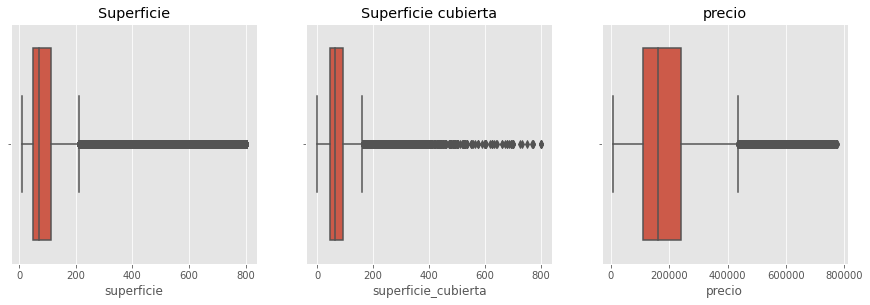

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot (3,3,1)
sns.boxplot (data=df, x="superficie") 
plt.title("Superficie")
plt.subplot (3,3,2)
sns.boxplot (data=df, x="superficie_cubierta") 
plt.title("Superficie cubierta")
plt.subplot (3,3,3)
sns.boxplot (data=df, x="precio") 
plt.title("precio")

<Figure size 864x720 with 0 Axes>

Text(0.5, 1.0, 'Superficie Cubierta')

Text(0.5, 0, 'Superficie Cubierta')

Text(0.5, 1.0, 'Superficie')

Text(0.5, 0, 'Superficie')

Text(0.5, 1.0, 'Precio')

Text(0.5, 0, 'Precio')

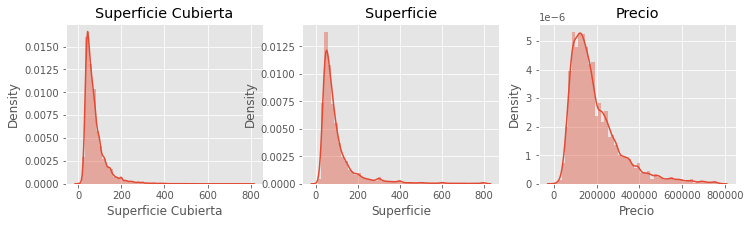

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot (3,3,1)
plt.title("Superficie Cubierta")
plt.xlabel ("Superficie Cubierta")
sns.distplot(df.superficie_cubierta.values)
plt.subplot (3,3,2)
plt.title("Superficie")
plt.xlabel ("Superficie")
sns.distplot(df.superficie.values)
plt.subplot (3,3,3)
plt.title("Precio")
plt.xlabel ("Precio")
sns.distplot(df.precio.values)

Como resultado final observamos datos sin tantos outliers que puedan "molestar" a nuestro modelo. Una distribución mucho mejor para intentar predecir precios.

Obviamente será un modelo para predecir la mayoría de las casas, sin tener en cuenta tanto los errores al cargar datos como las casas "atípicas".

### 3. Escalados de Datos Y Encoding

El escalado se debe realizar previo al encoder y es simplemente hacer un standard scaler para normalizar datos numéricos mediante standardscale: dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

En el Encoding lo que debemos lograr es que se puedan utilizar las variables categoricas a la hora de predecir el precio.
 1. Las variables categoricas son País, Región y Localidad.
 2. En lo que es País, todas están en argentina, por lo que no ayudan al modelo a diferenciar nada, eliminaremos dicha columna.
 3. Para las otras dos categoricas, realizaremos el procedimiento siguiente:

In [ ]:
df = df.drop(['pais'], axis=1)

In [ ]:
scaler = StandardScaler()

num_cols = df.select_dtypes(include=['float64', 'int']).columns
num_cols = num_cols.drop("precio")

df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
df

,latitud,longitud,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,precio,tipo
1,-0.3009,0.3836,Capital Federal,Boedo,-0.8168,-1.0054,0.8889,-0.3421,-0.3818,159000.0000,PH
2,0.0189,0.2723,Capital Federal,Palermo,-0.8168,-1.0054,-0.6730,-0.5805,-0.6305,125000.0000,PH
3,0.1476,0.2051,Capital Federal,Palermo,-0.8168,-1.0054,-0.6730,-0.1990,-0.5349,295000.0000,PH
4,-3.3443,3.8152,Bs.As. G.B.A. Zona Sur,La Plata,-0.8168,-1.0054,-0.6730,-0.5328,-0.8218,40000.0000,PH
5,0.0167,0.1726,Capital Federal,Villa Crespo,-0.8168,-1.0054,-0.6730,-0.4756,-0.4201,150000.0000,PH
...,...,...,...,...,...,...,...,...,...,...,...
146655,-2.3180,2.0502,Bs.As. G.B.A. Zona Sur,Berazategui,-0.8168,-1.0054,-0.6730,-0.4946,-0.5731,165000.0000,Departamento
146656,1.5620,-3.4233,Bs.As. G.B.A. Zona Norte,Pilar,1.0141,1.2564,0.8889,0.5544,0.2302,130000.0000,Departamento
146657,1.5811,-3.7404,Bs.As. G.B.A. Zona Norte,Pilar,-1.7323,-1.0054,-0.6730,-0.5328,-0.8218,73000.0000,Departamento
146658,1.5791,-3.7418,Bs.As. G.B.A. Zona Norte,Pilar,-0.8168,-1.0054,-0.6730,-0.6472,-0.7644,68000.0000,Departamento


In [ ]:
#Realizamos un train/test eligiendo los datos X e Y (eliminamos del X el precio y en Y sólo dejamos precio (target)). 

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('precio', axis = 'columns'),
                                        df['precio'],
                                        train_size   = 0.70,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [ ]:
# Transformaciones para las variables categóricas
pipe = Pipeline([ 
                    ('categ_encoder', MeanEncoder())
                    ])


In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('categ_encoder', MeanEncoder())])

In [ ]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

En este apartado anterior, realizamos el escalado a las variables numericas y realizamos encoder para las categoricas como así le pasamos un onehotencoder para binarizar (solo las categoricas).

In [ ]:
X_train
X_test
y_train
y_test

,latitud,longitud,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,tipo
140475,0.0616,0.3791,202883.5451,245574.4505,0.0986,0.1255,0.8889,-0.0083,0.4215,190632.0361
26762,0.2029,0.1211,202883.5451,208624.2168,1.0141,1.2564,0.8889,-0.2181,0.0963,190632.0361
113145,0.3045,0.2157,202883.5451,266303.2264,-1.7323,-1.0054,-0.6730,-0.5519,-0.6879,190632.0361
122895,-0.7341,-0.5185,129205.6200,135962.3472,1.0141,1.2564,-0.6730,1.8513,0.8040,218628.1056
52280,1.8327,-1.2863,206355.1441,229638.7538,1.0141,1.2564,0.8889,0.7069,1.9516,218628.1056
...,...,...,...,...,...,...,...,...,...,...
94777,-3.7040,3.3714,139861.1976,129503.4683,2.8450,1.2564,0.8889,2.8049,2.3341,218628.1056
146068,0.1759,0.4047,202883.5451,245574.4505,0.0986,0.1255,0.8889,-0.2086,0.1155,190632.0361
138540,-0.1137,-0.0778,202883.5451,178853.0492,0.0986,0.1255,-0.6730,-0.3421,-0.3053,190632.0361
955,2.6271,-3.0590,206355.1441,181382.6771,1.0141,1.2564,0.8889,0.8786,1.2439,218628.1056


,latitud,longitud,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,tipo
140424,0.1333,0.1650,202883.5451,208624.2168,1.0141,1.2564,2.4508,0.0775,0.3832,190632.0361
137404,0.4040,-0.0338,202883.5451,207597.6524,-0.8168,-1.0054,-0.6730,-0.3421,-0.5349,190632.0361
110126,-0.1274,0.4577,202883.5451,143175.8056,-0.8168,-1.0054,-0.6730,-0.6758,-0.8218,190632.0361
86048,-0.0379,0.6262,202883.5451,240389.5906,-1.7323,-1.0054,-0.6730,-0.7903,-1.0513,190632.0361
136316,-0.3888,0.0421,202883.5451,167447.4809,-0.8168,-1.0054,-0.6730,-0.4851,-0.7261,190632.0361
...,...,...,...,...,...,...,...,...,...,...
9940,0.0974,0.1821,202883.5451,245574.4505,-0.8168,-1.0054,-0.6730,-0.1227,-0.3818,179840.8530
37197,-0.1244,0.2541,202883.5451,173575.9624,-0.8168,-1.0054,-0.6730,-0.5995,-0.6687,190632.0361
24066,2.0863,-1.3154,206355.1441,229638.7538,-0.8168,-1.0054,-0.6730,-0.4374,-0.5349,190632.0361
37270,0.1755,0.0002,202883.5451,196445.9744,-0.8168,-1.0054,-0.6730,-0.6854,-0.8409,190632.0361


140475   265000.0000
26762    239000.0000
113145   185000.0000
122895   130000.0000
52280    138000.0000
             ...    
94777    170000.0000
146068   280000.0000
138540   155000.0000
955      220000.0000
19428     95000.0000
Name: precio, Length: 77538, dtype: float64

140424   343300.0000
137404   206000.0000
110126    95000.0000
86048     50000.0000
136316   109000.0000
             ...    
9940     180000.0000
37197    133000.0000
24066    190000.0000
37270     89000.0000
3501     125000.0000
Name: precio, Length: 33231, dtype: float64

#### Volvemos a graficar las variables numéricas como al principio para saber la nueva distribución

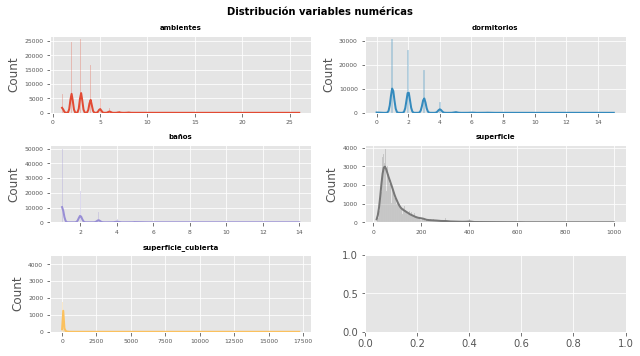

In [ ]:
##### Gráfico de distribución para cada variable numérica nueva

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = X.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = X,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Reprosesamiento de datos según sprint 1

Lo que haremos será utilizar la X y la y de este modelo para conocer si nuestro pre procesamiento logró alguna mejora.

Se utilizara el R2 y el RMSE para confirmarlo.

In [ ]:
#definimos el modelo
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)

#entrenamos los modelos

tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
#realizamos una estimación de los test con el modelo entrenado.

y_train_pred = tree_regressor.predict(X_train).round(2)
y_test_pred = tree_regressor.predict(X_test).round(2)

In [ ]:
#Metricas del modelo realizado en el step 1. Con los que se comparará los siguientes:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train (RMSE): {rmse_train.round()}')
print(f'Raíz del error cuadrático medio en Test (RMSE): {rmse_test.round()}')

Coeficiente_determinación_train = r2_score(y_train, y_train_pred)
Coeficiente_determinación_test = r2_score(y_test, y_test_pred)
print(f'El coeficiente de determinación en train es: {Coeficiente_determinación_train}')
print(f'El coeficiente de determinación en test es: {Coeficiente_determinación_test}')

Raíz del error cuadrático medio en Train (RMSE): 50313.0
Raíz del error cuadrático medio en Test (RMSE): 55585.0
El coeficiente de determinación en train es: 0.8189293459833193
El coeficiente de determinación en test es: 0.7857786115788892


In [ ]:
# Vamos a probar distintos depth

depths = [6,7,8,9,10,11,12,13,15,16,17,18]
tree_RMSEs_train = []
tree_RMSEs_test = []

for depth in depths: 
    max_depth = depth 

    tree_final = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    tree_final.fit(X_train, y_train)

    y_train_pred = tree_final.predict(X_train)
    y_test_pred = tree_final.predict(X_test)

    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
    R2_score_train = r2_score(y_train, y_train_pred).round(2)
    R2_score_test = r2_score(y_test, y_test_pred).round(2)
    
    tree_RMSEs_train.append(RMSE_train)
    tree_RMSEs_test.append(RMSE_test)
    
    tree_RMSEs_train_array = np.array(tree_RMSEs_train)
    tree_RMSEs_test_array = np.array(tree_RMSEs_test)

    print('Arbol de profundidad: ', depth)
    print('RMSE de train es: ', RMSE_train)
    print('RMSE de test es: ', RMSE_test)
    print('R2 score de train es: ', R2_score_train)
    print('R2 score de test es: ', R2_score_test, '\n')

DecisionTreeRegressor(max_depth=6, random_state=42)

Arbol de profundidad:  6
RMSE de train es:  62367.0
RMSE de test es:  64437.0
R2 score de train es:  0.72
R2 score de test es:  0.71 



DecisionTreeRegressor(max_depth=7, random_state=42)

Arbol de profundidad:  7
RMSE de train es:  59309.0
RMSE de test es:  61503.0
R2 score de train es:  0.75
R2 score de test es:  0.74 



DecisionTreeRegressor(max_depth=8, random_state=42)

Arbol de profundidad:  8
RMSE de train es:  56459.0
RMSE de test es:  59138.0
R2 score de train es:  0.77
R2 score de test es:  0.76 



DecisionTreeRegressor(max_depth=9, random_state=42)

Arbol de profundidad:  9
RMSE de train es:  53308.0
RMSE de test es:  57247.0
R2 score de train es:  0.8
R2 score de test es:  0.77 



DecisionTreeRegressor(max_depth=10, random_state=42)

Arbol de profundidad:  10
RMSE de train es:  50313.0
RMSE de test es:  55585.0
R2 score de train es:  0.82
R2 score de test es:  0.79 



DecisionTreeRegressor(max_depth=11, random_state=42)

Arbol de profundidad:  11
RMSE de train es:  47209.0
RMSE de test es:  54107.0
R2 score de train es:  0.84
R2 score de test es:  0.8 



DecisionTreeRegressor(max_depth=12, random_state=42)

Arbol de profundidad:  12
RMSE de train es:  43743.0
RMSE de test es:  53023.0
R2 score de train es:  0.86
R2 score de test es:  0.81 



DecisionTreeRegressor(max_depth=13, random_state=42)

Arbol de profundidad:  13
RMSE de train es:  40147.0
RMSE de test es:  51926.0
R2 score de train es:  0.88
R2 score de test es:  0.81 



DecisionTreeRegressor(max_depth=15, random_state=42)

Arbol de profundidad:  15
RMSE de train es:  32458.0
RMSE de test es:  50343.0
R2 score de train es:  0.92
R2 score de test es:  0.82 



DecisionTreeRegressor(max_depth=16, random_state=42)

Arbol de profundidad:  16
RMSE de train es:  28668.0
RMSE de test es:  50445.0
R2 score de train es:  0.94
R2 score de test es:  0.82 



DecisionTreeRegressor(max_depth=17, random_state=42)

Arbol de profundidad:  17
RMSE de train es:  24927.0
RMSE de test es:  49898.0
R2 score de train es:  0.96
R2 score de test es:  0.83 



DecisionTreeRegressor(max_depth=18, random_state=42)

Arbol de profundidad:  18
RMSE de train es:  21371.0
RMSE de test es:  50021.0
R2 score de train es:  0.97
R2 score de test es:  0.83 



<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Optimizacion de hiperparametros en Arbol de decision')

Text(0.5, 0, 'Depths')

Text(0, 0.5, 'RMSE')

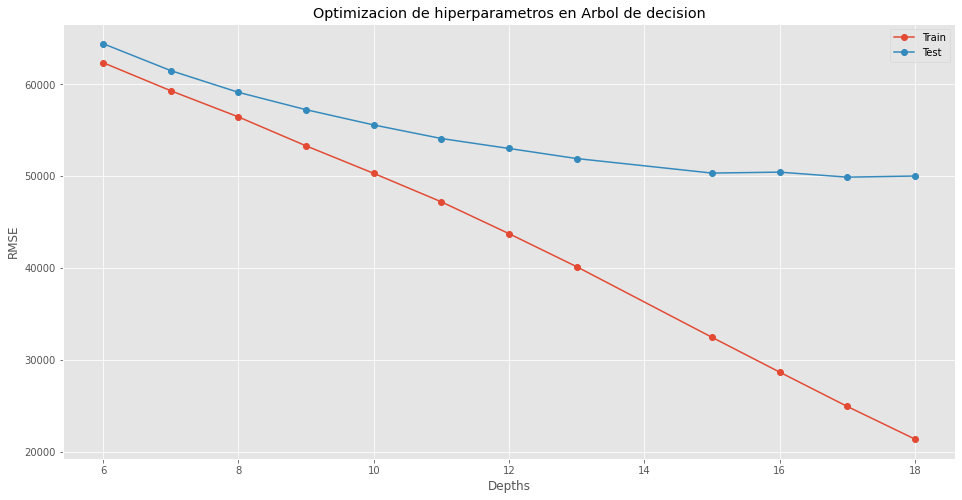

In [ ]:
plt.figure(figsize = (16,8))

plt.plot(depths, tree_RMSEs_train_array, 'o-', label = 'Train')
plt.plot(depths, tree_RMSEs_test_array, 'o-', label = 'Test')

plt.legend()
plt.title('Optimizacion de hiperparametros en Arbol de decision')
plt.xlabel('Depths')
plt.ylabel('RMSE')

### Conclusión
Podemos decir que la mejor opción es elegir entre 8, 9 y 10 depths comparados al primer modelo presentado en el sprint 1, ya que mejora increiblemente RMSE (entre 90.000 y 100.000) y  mejora un poco el R2 del test sin overfitear demasiado (antes había una diferencia entre train y test de 9 puntos y se bajó a 2/3 puntos en R2). 

Elijo el depths 10 ya que mejora mucho el % sin overfitear demasiado.

### 4. Reducción de Dimensionalidad (SVD)

Metodo de descomposición de variables para intentar disminuír su complejidad. Utilizamos SVD. Se toman las X transformadas para realizarlo.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
pca = PCA(n_components=4)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [ ]:
depths = [8,9,10,11,12,13]       # Variar la profundidad del arbol

for depth in depths: 
    max_depth = depth 
    tree_final = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    tree_final.fit(X_pca_train, y_train)

    y_train_pred = tree_final.predict(X_pca_train)
    y_test_pred = tree_final.predict(X_pca_test)

    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
    R2_score_train = r2_score(y_train, y_train_pred).round(2)
    R2_score_test = r2_score(y_test, y_test_pred).round(2)

    print('RMSE de train es: ', RMSE_train)
    print('RMSE de test es: ', RMSE_test)
    print('R2 score de train es: ', R2_score_train)
    print('R2 score de test es: ', R2_score_test)

DecisionTreeRegressor(max_depth=8, random_state=42)

RMSE de train es:  63125.0
RMSE de test es:  65365.0
R2 score de train es:  0.71
R2 score de test es:  0.7


DecisionTreeRegressor(max_depth=9, random_state=42)

RMSE de train es:  61332.0
RMSE de test es:  64165.0
R2 score de train es:  0.73
R2 score de test es:  0.71


DecisionTreeRegressor(max_depth=10, random_state=42)

RMSE de train es:  59403.0
RMSE de test es:  62969.0
R2 score de train es:  0.75
R2 score de test es:  0.73


DecisionTreeRegressor(max_depth=11, random_state=42)

RMSE de train es:  56887.0
RMSE de test es:  62182.0
R2 score de train es:  0.77
R2 score de test es:  0.73


DecisionTreeRegressor(max_depth=12, random_state=42)

RMSE de train es:  54295.0
RMSE de test es:  61410.0
R2 score de train es:  0.79
R2 score de test es:  0.74


DecisionTreeRegressor(max_depth=13, random_state=42)

RMSE de train es:  51535.0
RMSE de test es:  60929.0
R2 score de train es:  0.81
R2 score de test es:  0.74


In [ ]:
svd = TruncatedSVD(n_components=5, n_iter = 100, random_state = 42)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

In [ ]:
depths = [8,9,10,11,12,13]       # Variar la profundidad del arbol

for depth in depths: 
    max_depth = depth 

    tree_final = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

    tree_final.fit(X_svd_train, y_train)

    y_train_pred_svd = tree_final.predict(X_svd_train)
    y_test_pred_svd = tree_final.predict(X_svd_test)

    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred_svd)).round()
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred_svd)).round()
    R2_score_train = r2_score(y_train, y_train_pred_svd).round(2)
    R2_score_test = r2_score(y_test, y_test_pred_svd).round(2)

    print('RMSE de train es: ', RMSE_train)
    print('RMSE de test es: ', RMSE_test)
    print('R2 score de train es: ', R2_score_train)
    print('R2 score de test es: ', R2_score_test)

DecisionTreeRegressor(max_depth=8, random_state=42)

RMSE de train es:  62202.0
RMSE de test es:  64952.0
R2 score de train es:  0.72
R2 score de test es:  0.71


DecisionTreeRegressor(max_depth=9, random_state=42)

RMSE de train es:  59771.0
RMSE de test es:  63354.0
R2 score de train es:  0.74
R2 score de test es:  0.72


DecisionTreeRegressor(max_depth=10, random_state=42)

RMSE de train es:  57343.0
RMSE de test es:  62340.0
R2 score de train es:  0.76
R2 score de test es:  0.73


DecisionTreeRegressor(max_depth=11, random_state=42)

RMSE de train es:  54439.0
RMSE de test es:  61343.0
R2 score de train es:  0.79
R2 score de test es:  0.74


DecisionTreeRegressor(max_depth=12, random_state=42)

RMSE de train es:  51242.0
RMSE de test es:  60654.0
R2 score de train es:  0.81
R2 score de test es:  0.74


DecisionTreeRegressor(max_depth=13, random_state=42)

RMSE de train es:  47914.0
RMSE de test es:  59832.0
R2 score de train es:  0.84
R2 score de test es:  0.75


Luego de aplicar ambas tecnicas de reduccion de dimensionalidad con una perspectiva optimista, me encuentro con que los resultados no fueron satisfactorios en ninguno de los dos casos. Incluso estos se pusieron a prueba variando el numero de componentes, a medida que este se incrementa mejoran los resultados, pero pierde el sentido de eficiencia trabajar con la misma cantidad de atributos que el dataset a preprocesar.


No se tomará ninguna de estas dos prácticas para el futuro análisis.

## Conclusiones de la Parte A

Luego de realizar el pre procesamiento de datos a un nivel de detalle bastante amplio, lo cuál llevó un tiempo de procesamiento bastante grande (puede ser también por la falta de práctica en el codeo, ya que seguramente sea cuestión de minutos, a lo sumo horas para alguien con experiencia) la ganancia en cuestión de R2 score no fue significativa en cuanto a la capacidad de predicción.

Si lo fue para no realizar overfiteo y en cuanto al RMSE (error cuadrático medio) se puede decir que la mejoría es increible. Un modelo de predicción que tenga un RMSE de 150.000 como daba anteriormente, la verdad me desmotivó. Bajarlo casi 100.000 es agradable, aunque sigue siendo mucho, seguramente haya herramientas con los modelos avanzados para continuar experimentando.

Lo que sí no me queda claro es si esta disminución en el RMSE implica desprenderse de los "valores atípicos" que puede tener si se encuentra con casas "lujosas" por así decirlo. Y en que caso serviría y en que casos no lo hará.

## PARTE B - Modelos Avanzados

Para el presente trabajo, se estudiarán en profundidad dos modelos avanzados. Para ello, se entrenarán los siguientes con sus argumentos por defecto:
- REGRESION LINEAL AVANZADA - CON REGULARIZACION RIDGE
- RANDOM FOREST
- ADABOOST
- XGBOOST

Luego, se evaluaran utilizando las metricas RMSE y R2 score. 

Una vez seleccionados los 2 modelos se optimizarán sus hiperparametros mediante Random Search y se intentará realizar también por Optuna.

In [ ]:
# Seguimos con los mismos X e y para realizar los modelos.
X_train
X_test
y_train
y_test

,latitud,longitud,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,tipo
140475,0.0616,0.3791,202883.5451,245574.4505,0.0986,0.1255,0.8889,-0.0083,0.4215,190632.0361
26762,0.2029,0.1211,202883.5451,208624.2168,1.0141,1.2564,0.8889,-0.2181,0.0963,190632.0361
113145,0.3045,0.2157,202883.5451,266303.2264,-1.7323,-1.0054,-0.6730,-0.5519,-0.6879,190632.0361
122895,-0.7341,-0.5185,129205.6200,135962.3472,1.0141,1.2564,-0.6730,1.8513,0.8040,218628.1056
52280,1.8327,-1.2863,206355.1441,229638.7538,1.0141,1.2564,0.8889,0.7069,1.9516,218628.1056
...,...,...,...,...,...,...,...,...,...,...
94777,-3.7040,3.3714,139861.1976,129503.4683,2.8450,1.2564,0.8889,2.8049,2.3341,218628.1056
146068,0.1759,0.4047,202883.5451,245574.4505,0.0986,0.1255,0.8889,-0.2086,0.1155,190632.0361
138540,-0.1137,-0.0778,202883.5451,178853.0492,0.0986,0.1255,-0.6730,-0.3421,-0.3053,190632.0361
955,2.6271,-3.0590,206355.1441,181382.6771,1.0141,1.2564,0.8889,0.8786,1.2439,218628.1056


,latitud,longitud,region,localidad,ambientes,dormitorios,baños,superficie,superficie_cubierta,tipo
140424,0.1333,0.1650,202883.5451,208624.2168,1.0141,1.2564,2.4508,0.0775,0.3832,190632.0361
137404,0.4040,-0.0338,202883.5451,207597.6524,-0.8168,-1.0054,-0.6730,-0.3421,-0.5349,190632.0361
110126,-0.1274,0.4577,202883.5451,143175.8056,-0.8168,-1.0054,-0.6730,-0.6758,-0.8218,190632.0361
86048,-0.0379,0.6262,202883.5451,240389.5906,-1.7323,-1.0054,-0.6730,-0.7903,-1.0513,190632.0361
136316,-0.3888,0.0421,202883.5451,167447.4809,-0.8168,-1.0054,-0.6730,-0.4851,-0.7261,190632.0361
...,...,...,...,...,...,...,...,...,...,...
9940,0.0974,0.1821,202883.5451,245574.4505,-0.8168,-1.0054,-0.6730,-0.1227,-0.3818,179840.8530
37197,-0.1244,0.2541,202883.5451,173575.9624,-0.8168,-1.0054,-0.6730,-0.5995,-0.6687,190632.0361
24066,2.0863,-1.3154,206355.1441,229638.7538,-0.8168,-1.0054,-0.6730,-0.4374,-0.5349,190632.0361
37270,0.1755,0.0002,202883.5451,196445.9744,-0.8168,-1.0054,-0.6730,-0.6854,-0.8409,190632.0361


140475   265000.0000
26762    239000.0000
113145   185000.0000
122895   130000.0000
52280    138000.0000
             ...    
94777    170000.0000
146068   280000.0000
138540   155000.0000
955      220000.0000
19428     95000.0000
Name: precio, Length: 77538, dtype: float64

140424   343300.0000
137404   206000.0000
110126    95000.0000
86048     50000.0000
136316   109000.0000
             ...    
9940     180000.0000
37197    133000.0000
24066    190000.0000
37270     89000.0000
3501     125000.0000
Name: precio, Length: 33231, dtype: float64

#### Modelos

##### REGRESION LINEAL AVANZADA - CON REGULARIZACION RIDGE Y CROSS VALIDATE

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate

In [ ]:
degrees = [1,2,3]

for degree in degrees:

    poly = PolynomialFeatures(degree=degree, include_bias=False) 
    X_train_new = poly.fit_transform(X_train)
    X_test_new = poly.transform(X_test)  
    
    reg_ridge = Ridge(alpha= 1.0)
    
    scores = cross_validate(reg_ridge, X_train_new, y_train, cv = 5, return_train_score=True)
    
    reg_ridge.fit(X_train_new, y_train)

    y_train_pred = reg_ridge.predict(X_train_new)
    y_test_pred = reg_ridge.predict(X_test_new)

    RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
    RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
    R2_score_train = r2_score(y_train, y_train_pred).round(2)
    R2_score_test = r2_score(y_test, y_test_pred).round(2)

    print('Grado: ', degree)
    print('Score para train: ', scores['train_score'].mean().round(2),'+/-', scores['train_score'].std().round(5))
    print('Score para test: ', scores['test_score'].mean().round(2),'+/-', scores['test_score'].std().round(5))
    print('RMSE de train es: ', RMSE_train)
    print('RMSE de test es: ', RMSE_test)
    print('R2 score de train es: ', R2_score_train)
    print('R2 score de test es: ', R2_score_test, '\n')

Ridge()

Grado:  1
Score para train:  0.66 +/- 0.00196
Score para test:  0.66 +/- 0.0079
RMSE de train es:  69373.0
RMSE de test es:  70369.0
R2 score de train es:  0.66
R2 score de test es:  0.66 



Ridge()

Grado:  2
Score para train:  0.75 +/- 0.0014
Score para test:  0.75 +/- 0.00567
RMSE de train es:  59421.0
RMSE de test es:  61164.0
R2 score de train es:  0.75
R2 score de test es:  0.74 



Ridge()

Grado:  3
Score para train:  0.78 +/- 0.00089
Score para test:  0.78 +/- 0.00402
RMSE de train es:  54891.0
RMSE de test es:  56581.0
R2 score de train es:  0.78
R2 score de test es:  0.78 



Se puede observar que a partir del grado 4 hay un notable overfitting, ademas el incremento del costo computacional es exponencial.

Además el desempeño sigue siendo peor al arbol de decisión con 10 depth que vimos anteriormente. Continuaremos con los demás modelos y evaluaremos cuales son las dos mejores opciones a optimizar.

##### RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_f = RandomForestRegressor(n_estimators=100)

In [ ]:
scores = cross_validate(random_f, X_train, y_train, cv = 5, return_train_score=True)

print('Score para train: ', scores['train_score'].mean().round(2),'+/-', scores['train_score'].std().round(5))
print('Score para test: ', scores['test_score'].mean().round(2),'+/-', scores['test_score'].std().round(5))

Score para train:  0.98 +/- 0.00012
Score para test:  0.89 +/- 0.0036


In [ ]:
random_f.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_train_pred = random_f.predict(X_train)
y_test_pred = random_f.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
R2_score_train = r2_score(y_train, y_train_pred).round(2)
R2_score_test = r2_score(y_test, y_test_pred).round(2)

print('RMSE de train es: ', RMSE_train)
print('RMSE de test es: ', RMSE_test)
print('R2 score de train es: ', R2_score_train)
print('R2 score de test es: ', R2_score_test)


RMSE de train es:  15284.0
RMSE de test es:  38216.0
R2 score de train es:  0.98
R2 score de test es:  0.9


##### ADABOOST

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6),n_estimators=100)

In [ ]:
scores = cross_validate(adaboost, X_train, y_train, cv = 5, return_train_score=True)

print('Score para train: ', scores['train_score'].mean().round(2),'+/-', scores['train_score'].std().round(5))
print('Score para test: ', scores['test_score'].mean().round(2),'+/-', scores['test_score'].std().round(5))

Score para train:  0.68 +/- 0.01507
Score para test:  0.67 +/- 0.01157


In [ ]:
adaboost.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                  n_estimators=100)

In [ ]:
y_train_pred = adaboost.predict(X_train)
y_test_pred = adaboost.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
R2_score_train = r2_score(y_train, y_train_pred).round(2)
R2_score_test = r2_score(y_test, y_test_pred).round(2)

print('RMSE de train es: ', RMSE_train)
print('RMSE de test es: ', RMSE_test)
print('R2 score de train es: ', R2_score_train)
print('R2 score de test es: ', R2_score_test)

RMSE de train es:  68671.0
RMSE de test es:  70276.0
R2 score de train es:  0.66
R2 score de test es:  0.66


##### XGBOOST

In [ ]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(n_estimators = 100)

In [ ]:
scores = cross_validate(xgboost, X_train, y_train, cv = 5, return_train_score=True)

print('Score para train: ', scores['train_score'].mean().round(2),'+/-', scores['train_score'].std().round(5))
print('Score para test: ', scores['test_score'].mean().round(2),'+/-', scores['test_score'].std().round(5))

[00:02:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score para train:  0.79 +/- 0.00074
Score para test:  0.79 +/- 0.0029


In [ ]:
xgboost.fit(X_train, y_train)

[00:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
R2_score_train = r2_score(y_train, y_train_pred).round(2)
R2_score_test = r2_score(y_test, y_test_pred).round(2)

print('RMSE de train es: ', RMSE_train)
print('RMSE de test es: ', RMSE_test)
print('R2 score de train es: ', R2_score_train)
print('R2 score de test es: ', R2_score_test)

RMSE de train es:  54197.0
RMSE de test es:  55715.0
R2 score de train es:  0.79
R2 score de test es:  0.78


Se observa que el Random Forest, si bien overfiteando, hace un excelente trabajo en la predicción, superando a todos los otros modelos predictivos.
Se tomará dicho modelo y el XGboost por ser el siguiente mejor para realizar la optimización de hiperparámetros.

#### OPTIMIZACION DE HIPERPARAMETROS

###### RANDOM SERCH

Utilizaremos Random serch para buscar los mejores parámetros posibles a utilizar por los modelos seleccionados.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

###### Random forest

In [ ]:
random_f = RandomForestRegressor()

param_dist = {'n_estimators': [100, 200],
             'max_features': np.arange(2,5)}

model_random = RandomizedSearchCV(random_f, param_distributions=param_dist,
                                  n_iter = 10, random_state = 42, cv=5)

model_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': array([2, 3, 4]),
                                        'n_estimators': [100, 200]},
                   random_state=42)

In [ ]:
print("Mejores parametros: "+str(model_random.best_params_))

Mejores parametros: {'n_estimators': 200, 'max_features': 3}


###### XGBoost

In [ ]:
xgboost = xgb.XGBRegressor(objective = "reg:squarederror")

param_dist = {'n_estimators': [100, 200, 400],
             'max_depth': np.arange(7,13),
             'learning_rate': [0.1, 0.2, 0.4]}

model_xg = RandomizedSearchCV(xgboost, param_distributions=param_dist,
                              n_iter = 20, random_state = 42, cv=5)

model_xg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
                   n_iter=20,
                   param_distributions={'learning_rate': [0.1, 0.2, 0.4],
                                        'max_depth': array([ 7,  8,  9, 10, 11, 12]),
                                        'n_estimators': [100, 200, 400]},
                   random_state=42)

In [ ]:
print("Mejores parametros: "+str(model_xg.best_params_))

Mejores parametros: {'n_estimators': 400, 'max_depth': 12, 'learning_rate': 0.1}


### Creamos el modelo de Random Forest con los mejores parametros que arrojo el modelo de RandomSearch

In [ ]:
random_f = RandomForestRegressor(n_estimators=200, max_features=3)

random_f.fit(X_train, y_train)

RandomForestRegressor(max_features=3, n_estimators=200)

In [ ]:
y_train_pred = random_f.predict(X_train)
y_test_pred = random_f.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
R2_score_train = r2_score(y_train, y_train_pred).round(2)
R2_score_test = r2_score(y_test, y_test_pred).round(2)

print('RMSE de train es: ', RMSE_train)
print('RMSE de test es: ', RMSE_test)
print('R2 score de train es: ', R2_score_train)
print('R2 score de test es: ', R2_score_test)

RMSE de train es:  14759.0
RMSE de test es:  37075.0
R2 score de train es:  0.98
R2 score de test es:  0.9


#### IMPORTANCIA DE LOS ATRIBUTOS: EN EL MODELO RANDOM FOREST

In [ ]:
feature_random = pd.DataFrame(data = random_f.feature_importances_,
                              index= ["latitud", "longitud", "region",	"localidad",
                                      "ambientes",	"dormitorios",	"baños",	"superficie",
                                      "superficie_cubierta",	"tipo"],
                                 columns = ['importance'])
 
feature_random.sort_values(by=['importance'], ascending = False)

,importance
superficie_cubierta,0.2155
baños,0.1641
localidad,0.1593
superficie,0.1529
latitud,0.0930
longitud,0.0842
ambientes,0.0434
dormitorios,0.0415
region,0.0281
tipo,0.0180


Con respecto a la importancia de los atributos del modelo de Random Forest, nos encontramos con que las variables que explican la superficie son las que mayor participacion tienen.

##### Distribución de errores

<Figure size 1152x576 with 0 Axes>

(-100000.0, 100000.0)

Text(0.5, 1.0, 'Distribucion de los errores')

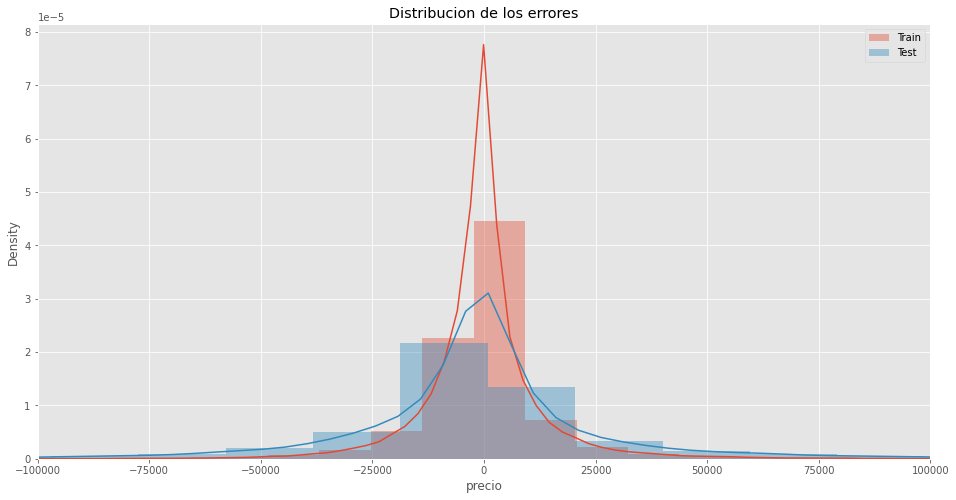

In [ ]:
errores_train = y_train - y_train_pred
errores_test = y_test - y_test_pred

plt.figure(figsize = (16,8))
sns.distplot(errores_train, bins = 50, label = 'Train')
sns.distplot(errores_test, bins = 50, label = 'Test')

plt.xlim(-100000, 100000)

plt.title('Distribucion de los errores')
plt.legend()
plt.show()

Al comparar las curvas superpuestas de train y test, se puede notar el sobreajuste aunque no tan pronunciado.

Por otro lado, se nota un sesgo que indica que generalmente el modelo predice un precio mayor en las propiedades, lo que genera que haya mas errores con signo negativo.

### Creamos el modelo de XGBoost con los mejores parametros que arrojo el modelo de RandomSearch

In [ ]:
xgboost = xgb.XGBRegressor(n_estimators= 400, max_depth= 12, learning_rate= 0.2)

xgboost.fit(X_train, y_train)

[00:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=12, n_estimators=400)

In [ ]:
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train, y_train_pred)).round()
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred)).round()
R2_score_train = r2_score(y_train, y_train_pred).round(2)
R2_score_test = r2_score(y_test, y_test_pred).round(2)

print('RMSE de train es: ', RMSE_train)
print('RMSE de test es: ', RMSE_test)
print('R2 score de train es: ', R2_score_train)
print('R2 score de test es: ', R2_score_test)

RMSE de train es:  9361.0
RMSE de test es:  36813.0
R2 score de train es:  0.99
R2 score de test es:  0.91


#### IMPORTANCIA DE LOS ATRIBUTOS

In [ ]:
feature_importance = pd.DataFrame(data = xgboost.feature_importances_,
                              index= ["latitud", "longitud", "region",	"localidad",
                                      "ambientes",	"dormitorios",	"baños",	"superficie",
                                      "superficie_cubierta",	"tipo"],
                                 columns = ['importance'])
 
feature_importance.sort_values(by=['importance'], ascending = False)

,importance
baños,0.5677
localidad,0.1737
region,0.0969
superficie_cubierta,0.0660
tipo,0.0352
superficie,0.0207
longitud,0.0131
dormitorios,0.0130
latitud,0.0073
ambientes,0.0065


<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Importancia de los atributos')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 0, 'Atributos')

Text(0, 0.5, 'Importancia')

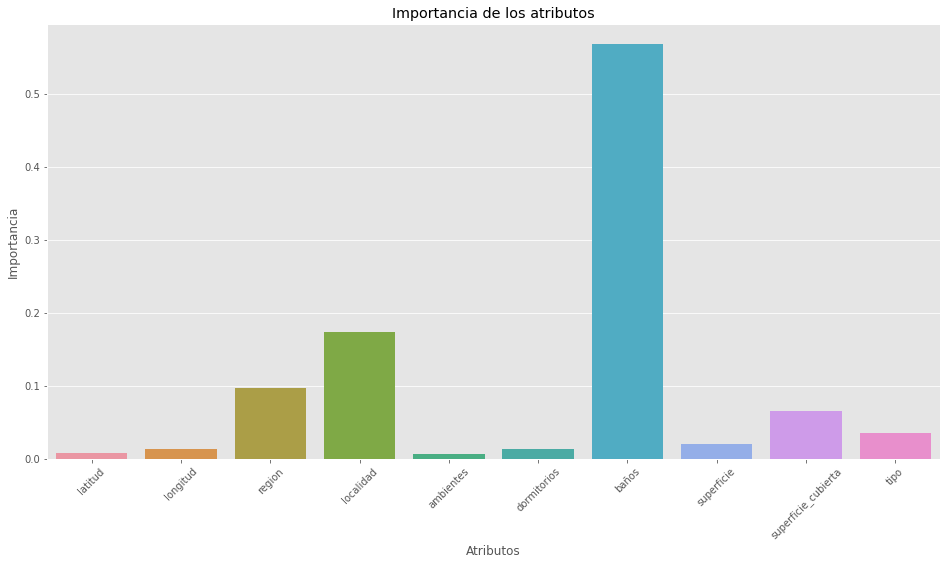

In [ ]:
plt.figure(figsize = (16,8))

sns.barplot(feature_importance.index,feature_importance.importance)

plt.title('Importancia de los atributos')
plt.xticks(rotation=45)
plt.xlabel("Atributos")
plt.ylabel("Importancia")
plt.show()

##### Distribución de errores

<Figure size 1152x576 with 0 Axes>

(-100000.0, 100000.0)

Text(0.5, 1.0, 'Distribucion de los errores')

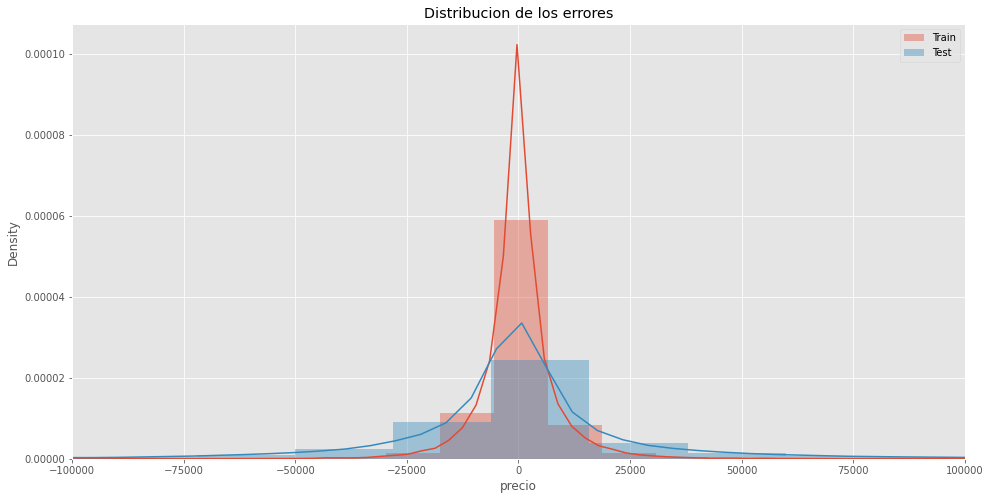

In [ ]:
errores_train = y_train - y_train_pred
errores_test = y_test - y_test_pred

plt.figure(figsize = (16,8))
sns.distplot(errores_train, bins = 50, label = 'Train')
sns.distplot(errores_test, bins = 50, label = 'Test')

plt.xlim(-100000, 100000)

plt.title('Distribucion de los errores')
plt.legend()
plt.show()

Las curvas llevan una distribucion normal alrededor del 0, lo que indica un buen funcionamiento del modelo, y a diferencia del Random Forest, bastante uniforme. Aunque, se evidencia con mayor claridad el sobreajuste.

Es importante destacar el patron de forma poligonal de ambas, el cual tambien se presento en Random Forest, pero de una manera mas sutil.

Luego de comparar los modelos de Random Forest y XGBoost, tengo una preferencia con el ultimo mencionado. Principalmente, por su RMSE de test menor y mayor R2 score (lamentablemente con un sobreajuste), y tambien, por una distribucion de errores uniforme que carece de sesgo.

# Requisitos Adicionales

Se buscará determinar si un estudio mediante clustering permite distinguir los tipos de propiedad y con que porcentaje de acierto lo hace.

Para ello utilizamos el data set resumido del primer proyecto


In [ ]:
dataset_cluster_validador = pd.read_csv("/content/gdrive/MyDrive/ACAMICA - DS/proyecto 2/DS_Proyecto_01_Datos_Properati.csv")
dataset_cluster_validador = pd.DataFrame(dataset_cluster_validador[dataset_cluster_validador.property_type.isin(["Departamento", "PH", "Casa"]) & dataset_cluster_validador.l2.isin(["Capital Federal"])])

dataset_cluster_validador.columns = ["inicio", "finalización", "creado", "latitud", "longitud", "pais", "region", "localidad", "ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio", "moneda", "titulo", "descripcion", "tipo", "tipo_de_operacion"]
dataset_cluster = dataset_cluster_validador[["latitud", "longitud", "ambientes", "dormitorios", "baños", "superficie", "superficie_cubierta", "precio", "tipo"]]
dataset_cluster = dataset_cluster[(dataset_cluster.superficie >= 15) & (dataset_cluster.superficie <= 1000)]
dataset_cluster = dataset_cluster[(dataset_cluster.precio <= 4000000)]
dataset_cluster = dataset_cluster.dropna()

# Reseteo index
dataset_cluster.reset_index(drop = True, inplace = True)

# respuestas correctas
dataset_cluster_respuestas_correctas = dataset_cluster[["tipo"]].copy() # separo las respuestas correctas que despues voy a unir
dataset_cluster.drop(columns = ['tipo'], inplace = True) # elimino para poder entrenar


print("nombres de las columnas: ", dataset_cluster.columns)
print("cantidad de filas y columnas: ", dataset_cluster.shape)

nombres de las columnas:  Index(['latitud', 'longitud', 'ambientes', 'dormitorios', 'baños',
       'superficie', 'superficie_cubierta', 'precio'],
      dtype='object')
cantidad de filas y columnas:  (76771, 8)


In [ ]:
dataset_cluster

,latitud,longitud,ambientes,dormitorios,baños,superficie,superficie_cubierta,precio
0,-34.6059,-58.3849,7.0000,7.0000,2.0000,140.0000,140.0000,153000.0000
1,-34.6241,-58.4121,2.0000,1.0000,2.0000,70.0000,58.0000,159000.0000
2,-34.5936,-58.4275,2.0000,1.0000,1.0000,45.0000,45.0000,125000.0000
3,-34.5813,-58.4368,2.0000,1.0000,1.0000,85.0000,50.0000,295000.0000
4,-34.5938,-58.4412,2.0000,1.0000,1.0000,56.0000,56.0000,150000.0000
...,...,...,...,...,...,...,...,...
76766,-34.5813,-58.4312,4.0000,3.0000,2.0000,106.0000,100.0000,620000.0000
76767,-34.5854,-58.4272,4.0000,3.0000,3.0000,175.0000,111.0000,570000.0000
76768,-34.5854,-58.4272,3.0000,2.0000,2.0000,144.0000,134.0000,480000.0000
76769,-34.5841,-58.4364,4.0000,2.0000,2.0000,317.0000,143.0000,530000.0000


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Especificamos el numero adecuado de clusters en cada caso
kmeans = KMeans(n_clusters=3, random_state=0)

Elegimos 3 cluster para ver si diferencia PH, Casas y departamentos

In [ ]:
kmeans.fit(dataset_cluster)

KMeans(n_clusters=3, random_state=0)

In [ ]:
etiquetas = kmeans.labels_
print(etiquetas.shape)

(76771,)


In [ ]:
dataset_cluster_grafico = dataset_cluster.values

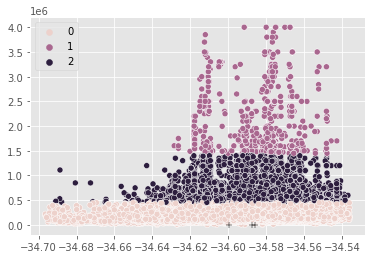

In [ ]:
sns.scatterplot (dataset_cluster_grafico[:,0], dataset_cluster_grafico[:,-1], hue = etiquetas, c = etiquetas)
sns.scatterplot(centros[:, 0], centros[:, 1],color='black', marker="+")


In [ ]:
etiquetas = pd.DataFrame(kmeans.labels_, columns = ['etiquetas_kmeans'])
print(etiquetas.shape)     

(76771, 1)


In [ ]:
print (etiquetas)

       etiquetas_kmeans
0                     0
1                     0
2                     0
3                     0
4                     0
...                 ...
76766                 2
76767                 2
76768                 2
76769                 2
76770                 0

[76771 rows x 1 columns]


In [ ]:
dataset_cluster_respuestas_correctas = pd.merge(dataset_cluster_respuestas_correctas, etiquetas, how = 'left', left_index = True, right_index = True)

In [ ]:
df_bien_depto = dataset_cluster_respuestas_correctas[dataset_cluster_respuestas_correctas.tipo == 'Departamento'].copy()
df_bien_depto.etiquetas_kmeans.value_counts()
# si el resultado es 100% una etiqueta 0% 0% las otras dos, es perfecto; si da 33% 33% 33%; es porque no lo pudo diferenciar

0    58767
2     5715
1      847
Name: etiquetas_kmeans, dtype: int64

Observamos que diferenció bien la mayor parte de las etiquetas. Pero con un desvío mayor a los modelos anteriores.

In [ ]:
centros = kmeans.cluster_centers_
print(centros)

[[-3.45995016e+01 -5.84369930e+01  2.83014537e+00  1.87235640e+00
   1.38757922e+00  8.01526180e+01  7.11042139e+01  1.87679472e+05]
 [-3.45856993e+01 -5.84019280e+01  5.22196796e+00  3.50915332e+00
   3.85926773e+00  3.56465675e+02  3.17203661e+02  2.15863907e+06]
 [-3.45875462e+01 -5.84166892e+01  4.53139149e+00  3.11500151e+00
   2.79957742e+00  2.11534561e+02  1.92458044e+02  7.22791129e+05]]


In [ ]:
df_depto_verdad = dataset_cluster_validador.tipo == 'Departamento'

df_depto_verdad

0          True
1         False
2         False
3         False
5         False
          ...  
146554    False
146555    False
146556    False
146557     True
146558     True
Name: tipo, Length: 91485, dtype: bool

In [ ]:
df_depto_verdad.value_counts()

True     79029
False    12456
Name: tipo, dtype: int64

#Conclusión de Requisitos Adicionales

###Se observa a simple vista que la cantidad de departamentos en el original es de 79029 departamentos, mientras que el clustering dividió en 3 cluster, siendo el más cercano al número anterior de 69271.

###Suponiendo que está adjuntando departamentos en ese primer cluster, ya tenemos una diferencia de casi 10.000.

###Esto demuestra que utilizar esta forma de transformación y este modelo, no es una opción viable. Cómo se suponia previo realizarla

#Conclusiones del sprint

##Como conclusiones finales del sprint, queda demostrado que para este tipo de proyectos los modelos supervisados tienen mayor distinción y logran mejores resultados.

##Por otro lado, tener mayor cantidad de datos y de buena calidad, logran que los modelos predigan con menos errores, lo cuál un buen análisis previo de los mismos es determinante.